# 1. Data Processing

## 1.1 Data Preparation

In [1]:
# Import Packages
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
from statistics import mode
from scipy.stats import norm,skew,stats
from scipy import stats
import matplotlib.pyplot as plt
from statlearning import plot_regressions
from statlearning import plot_histogram

In [2]:
# Plot settings

sns.set_context('notebook') 
sns.set_style('ticks') 
crayon = ['#4E79A7','#F28E2C','#E15759','#76B7B2','#59A14F', '#EDC949','#AF7AA1','#FF9DA7','#9C755F','#BAB0AB']
sns.set_palette("pastel")
%matplotlib inline
plt.rcParams['figure.figsize'] = (9, 6)

In [3]:
# Read in csv files and plot top of training data
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

# Combining the train and test data to deal with the missing value

combined=pd.concat([test, train], axis=0)
train.head()
test.head()
combined.head()

/Users/apple/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  import sys


,Id,accommodates,bathrooms,bed_type,bedrooms,beds,cancellation_policy,cleaning_fee,experiences_offered,extra_people,...,review_scores_accuracy,review_scores_checkin,review_scores_cleanliness,review_scores_communication,review_scores_location,review_scores_rating,review_scores_value,reviews_per_month,room_type,security_deposit
0,0,4,2.0,Real Bed,2.0,2.0,moderate,84.0,none,15,...,10.0,10.0,10.0,10.0,10.0,100.0,10.0,0.69,Entire home/apt,85.0
1,1,5,2.0,Real Bed,2.0,3.0,strict_14_with_grace_period,NaN,none,0,...,2.0,8.0,8.0,10.0,10.0,60.0,8.0,0.13,Entire home/apt,NaN
2,2,6,2.0,Real Bed,3.0,4.0,moderate,NaN,none,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Entire home/apt,NaN
3,3,2,1.0,Real Bed,2.0,2.0,moderate,NaN,none,0,...,9.0,9.0,8.0,8.0,10.0,90.0,10.0,0.20,Entire home/apt,NaN
4,4,4,1.5,Real Bed,2.0,2.0,moderate,95.0,none,0,...,10.0,10.0,10.0,10.0,10.0,99.0,10.0,0.58,Entire home/apt,200.0


In [4]:
# check the types of data

train.dtypes

Id                                    int64
price                                 int64
experiences_offered                  object
host_response_time                   object
host_response_rate                  float64
host_is_superhost                    object
host_listings_count                   int64
host_identity_verified               object
latitude                            float64
longitude                           float64
property_type                        object
room_type                            object
accommodates                          int64
bathrooms                           float64
bedrooms                            float64
beds                                float64
bed_type                             object
security_deposit                    float64
cleaning_fee                        float64
guests_included                       int64
extra_people                          int64
minimum_nights                        int64
maximum_nights                  

In [5]:
# count missing data

train.isna().sum().sort_values(ascending=False)

security_deposit                    335
host_response_time                  302
host_response_rate                  302
review_scores_accuracy              265
review_scores_value                 265
review_scores_location              265
review_scores_cleanliness           265
review_scores_rating                264
review_scores_communication         264
review_scores_checkin               264
reviews_per_month                   249
cleaning_fee                        242
beds                                  1
bedrooms                              1
bathrooms                             1
instant_bookable                      0
longitude                             0
price                                 0
experiences_offered                   0
require_guest_profile_picture         0
cancellation_policy                   0
host_is_superhost                     0
host_listings_count                   0
host_identity_verified                0
latitude                              0


In [6]:
# Examine missingness of the testing data
combined.isna().sum().sort_values(ascending=False)

price                               1000
security_deposit                     642
host_response_rate                   617
host_response_time                   617
review_scores_value                  518
review_scores_location               517
review_scores_checkin                516
review_scores_accuracy               516
review_scores_cleanliness            516
review_scores_communication          516
review_scores_rating                 515
reviews_per_month                    479
cleaning_fee                         472
bathrooms                              6
beds                                   3
bedrooms                               2
host_is_superhost                      1
host_listings_count                    1
host_identity_verified                 1
extra_people                           0
experiences_offered                    0
cancellation_policy                    0
guests_included                        0
accommodates                           0
bed_type        

## 1.2 Handling Missing Value

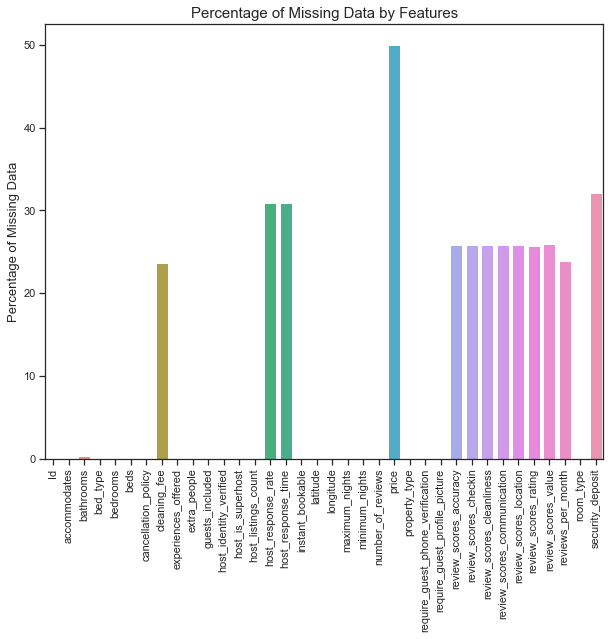

In [7]:
# plot percentage of missing data

missingdata_p_1 = (combined.isnull().sum() / len(combined)) * 100
plt.subplots(figsize = (10, 8))
sns.barplot(x = missingdata_p_1.index, y = missingdata_p_1)
plt.xticks(rotation = '90')
plt.ylabel('Percentage of Missing Data', fontsize = 13)
plt.title('Percentage of Missing Data by Features', fontsize = 15)
plt.show()

In [8]:
# drop ID from the dataframe "Variables" 
Variables=['experiences_offered','host_response_time','host_response_rate','host_is_superhost',
          'host_listings_count','host_identity_verified','latitude','longitude','property_type',
          'room_type','accommodates','bathrooms','bedrooms','beds','bed_type','security_deposit',
          'cleaning_fee','guests_included','extra_people','minimum_nights','maximum_nights','number_of_reviews',
          'review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication',
          'review_scores_location','review_scores_value','instant_bookable','cancellation_policy',
          'require_guest_profile_picture','require_guest_phone_verification','reviews_per_month']

Text(0.5, 1.0, 'Top10 correlations among variables')

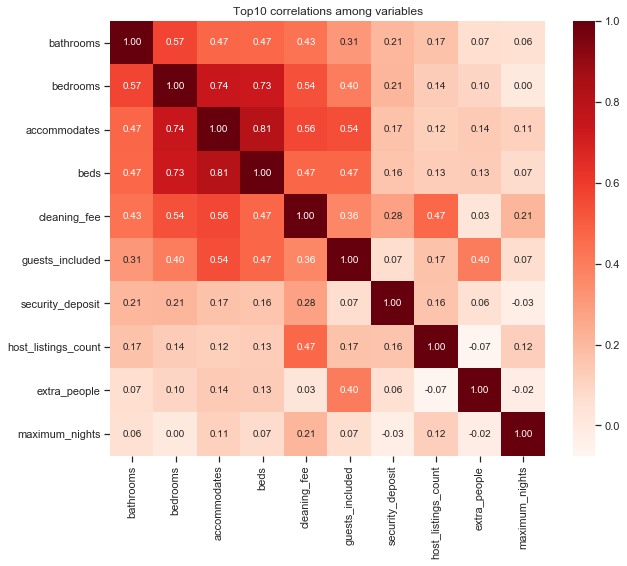

In [9]:
corrmant=train[Variables].corr()

Top10_Variables=corrmant['bathrooms'].nlargest(n=10).index
Top10=corrmant[Top10_Variables].loc[Top10_Variables]

plt.subplots(figsize=(10,8))
sns.heatmap(Top10,vmax=1,square=True,annot=True,fmt=".2f",cmap="Reds")
plt.title('Top10 correlations among variables')

In [10]:
# Show what variables are categorical
numeric_combined=combined.select_dtypes(include=[np.number])
categoric_combined=combined.select_dtypes(exclude=[np.number])
categoric_combined.columns

Index(['bed_type', 'cancellation_policy', 'experiences_offered',
       'host_identity_verified', 'host_is_superhost', 'host_response_time',
       'instant_bookable', 'property_type', 'require_guest_phone_verification',
       'require_guest_profile_picture', 'room_type'],
      dtype='object')

In [11]:
# Show what variables are numeric
numeric_combined.columns

Index(['Id', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'cleaning_fee',
       'extra_people', 'guests_included', 'host_listings_count',
       'host_response_rate', 'latitude', 'longitude', 'maximum_nights',
       'minimum_nights', 'number_of_reviews', 'price',
       'review_scores_accuracy', 'review_scores_checkin',
       'review_scores_cleanliness', 'review_scores_communication',
       'review_scores_location', 'review_scores_rating', 'review_scores_value',
       'reviews_per_month', 'security_deposit'],
      dtype='object')

In [12]:
combined['beds'].fillna(np.mean(combined['beds']),inplace=True)

In [13]:
# check 'bedrooms'
combined.bedrooms.unique()

array([ 2.,  3.,  1.,  0.,  4.,  5.,  6., nan,  7.])

In [14]:
combined['bedrooms'].fillna(np.mean(combined['bedrooms']),inplace=True)

In [15]:
# calculate the mean of bedrooms
combined['bedrooms']
print(combined['bedrooms'].mean())

1.4034034034034035


In [16]:
# calculate the mean of accommodates
combined['accommodates']
print(combined['accommodates'].mean())

3.1975


In [17]:
# calculate the mean of beds
combined['beds']
print(combined['beds'].mean())

1.7085628442663996


In [18]:
# calculate the average of the above three variables'means 
a = 1.4026982698256136
b = 3.1975
c = 1.7085628442663996
d=(a+b+c)/3
round(d,3)

2.103

In [19]:
# check ‘bathrooms’
combined.bathrooms.unique()

array([ 2. ,  1. ,  1.5,  2.5,  3. ,  5. ,  nan,  0.5,  0. ,  3.5,  4.5,
       10. ,  4. ])

In [20]:
# use the average of the above three variables'means to fill NaN in bathrooms
combined.bathrooms.fillna(2.103,inplace=True)

In [21]:
# check ‘security_deposit’
combined.security_deposit.unique()

array([  85.,   nan,  200.,    0.,  250.,  550.,  400.,  100.,  180.,
        350.,  495.,   86., 1000.,  500.,  800., 3800.,  300.,  150.,
        700.,  750.,   80.,   63.,  120.,   75.,  450.,   72.,   96.,
        850.,  650., 3827.,  858.,  642.,   99., 3000.,   90.,  110.,
        480., 3500.,   74.,  899.,  430.,  220.,  900.,  210.,   77.,
         76.,  199.,  600.,  130.,  571., 2000.,  172.,   65.,   66.,
         79.,  195.,  557.,  301.,   78., 1300.,   81.,  330.,   84.,
        219., 3788.,   82.,  160.,  175., 1500.,   70.,   98.,  149.,
        152., 2500.])

In [22]:
# fill 0 to NaN for "security_deposit" 
combined.security_deposit.fillna(0,inplace=True)

In [23]:
# check 'cleaning_fee'
combined.cleaning_fee.unique()

array([ 84.,  nan,  95.,  64.,  50.,  30.,  60.,  40.,  28.,  80.,  15.,
        90.,  12.,  25.,  65., 225.,  20.,  51.,  35.,  55.,  18.,  85.,
        10.,   5.,  38.,   0.,  11.,  59.,   4., 300.,  45.,  75.,  21.,
       100., 150.,  86.,  70.,  19.,  22.,  48.,  32., 140.,  13.,  58.,
        99.,  29., 113.,  36.,  26., 130., 486., 104.,  49.,  39.,   9.,
        93.,   8.,  34.,   6., 135.,  98., 110., 129.,  71.,  69.,  43.,
        17., 120.,  33., 138., 145.,  14.,  68., 103., 195., 160., 125.,
       200.,  56., 375.,  92., 155.,  44.,  63.,  16.,  24., 132.,   7.,
        27.,  89.,  23.,  67., 108.,  61., 128.,  79., 105.,  94., 118.,
        37.])

In [24]:
# fill 0 to NaN for "cleaning_fee"
combined.cleaning_fee.fillna(0,inplace=True)

In [25]:
combined.host_response_time.unique()


array(['within an hour', 'within a few hours', nan, 'within a day',
       'a few days or more'], dtype=object)

In [26]:
# fill the mode to NaN for host_response_time
combined['host_response_time']
print(combined['host_response_time'].mode())

0    within an hour
dtype: object


In [27]:
combined.host_response_time.fillna('within an hour',inplace=True)
# fill the mean to NaN for host_response_rate
combined['host_response_rate'].fillna(np.mean(combined['host_response_rate']),inplace=True)
# Convert true/false to 1/0
# fill 0 to NaN for "host_is_superhost"
combined['host_is_superhost']=combined.host_is_superhost.map({"f":0,"t":1})
combined.host_is_superhost.fillna(0,inplace=True)

In [28]:
# fill the mean to NaN for host_listings_count
combined['host_listings_count'].fillna(np.mean(combined['host_listings_count']),inplace=True)
# Convert true/false to 1/0
# fill 0 to NaN for "host_identity_verified"
combined['host_identity_verified']=combined.host_identity_verified.map({"f":0,"t":1})
combined.host_identity_verified.fillna(0,inplace=True)
combined.reviews_per_month.fillna(0,inplace=True)

In [29]:
# Rescale the review_scores_rating
scaling_100='review_scores_rating'
combined['review_scores_rating'].fillna(np.mean(combined['review_scores_rating']),inplace=True)
combined[scaling_100]=combined['review_scores_rating']/10

In [30]:
combined['review_scores_accuracy'].fillna(np.mean(combined['review_scores_accuracy']),inplace=True)
combined['review_scores_cleanliness'].fillna(np.mean(combined['review_scores_cleanliness']),inplace=True)
combined['review_scores_communication'].fillna(np.mean(combined['review_scores_communication']),inplace=True)
combined['review_scores_location'].fillna(np.mean(combined['review_scores_location']),inplace=True)
combined['review_scores_value'].fillna(np.mean(combined['review_scores_value']),inplace=True)
combined['review_scores_checkin'].fillna(np.mean(combined['review_scores_checkin']),inplace=True)


In [31]:
# Recheck the whether there is any missing values
combined.isna().sum().sort_values(ascending=False)

price                               1000
security_deposit                       0
instant_bookable                       0
host_response_rate                     0
host_listings_count                    0
host_is_superhost                      0
host_identity_verified                 0
guests_included                        0
extra_people                           0
experiences_offered                    0
cleaning_fee                           0
cancellation_policy                    0
beds                                   0
bedrooms                               0
bed_type                               0
bathrooms                              0
accommodates                           0
host_response_time                     0
latitude                               0
room_type                              0
review_scores_checkin                  0
reviews_per_month                      0
review_scores_value                    0
review_scores_rating                   0
review_scores_lo

## 1.3 Split Training Data and Testing Data

In [32]:
Response = 'price'
Predictors = list(combined.drop(['price'],axis = 1))

test_new = combined[:1000]
train_new = combined[1000:]

# 2. Exploratory Data Analysis

## 2.1 Data Description and Visualisation for Price

In [33]:
# check the price column
train_new.price.describe()

count    1000.000000
mean      103.997000
std        70.387623
min        25.000000
25%        50.000000
50%        85.000000
75%       135.000000
max       400.000000
Name: price, dtype: float64

In [34]:
# check the skewness of price
train_new.price.skew()

1.6454669493901388

Text(0.5, 1.0, 'Distribution of Airbnb Price')

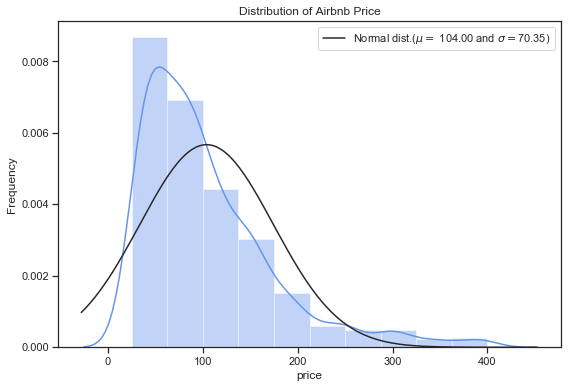

In [35]:
# Distribution of Airbnb Price
y= train_new['price']
sns.distplot(y,fit=norm, bins=10,color='cornflowerblue')
(mu,sigma)=norm.fit(y)
plt.legend(['Normal dist.($\mu=$ {:.2f} and $\sigma=${:.2f})'.format(mu,sigma)],loc='best')
plt.ylabel('Frequency')
plt.title('Distribution of Airbnb Price')

Text(0.5, 1.0, 'Distribution of Airbnb Price after log transformation')

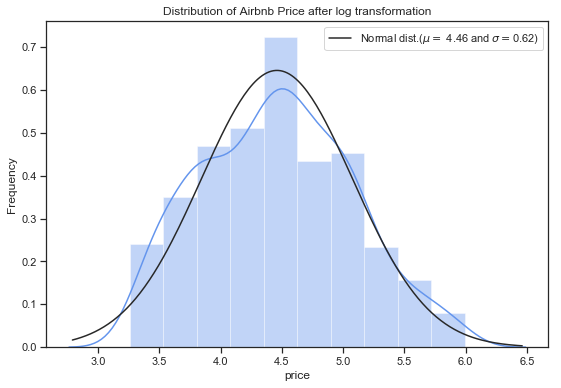

In [36]:
# Distribution after log transformation
y_log_train_new=np.log1p(y)
sns.distplot(y_log_train_new,fit=norm, bins=10,color='cornflowerblue')
(mu,sigma)=norm.fit(y_log_train_new)
plt.legend(['Normal dist.($\mu=$ {:.2f} and $\sigma=${:.2f})'.format(mu,sigma)],loc='best')
plt.ylabel('Frequency')
plt.title('Distribution of Airbnb Price after log transformation')

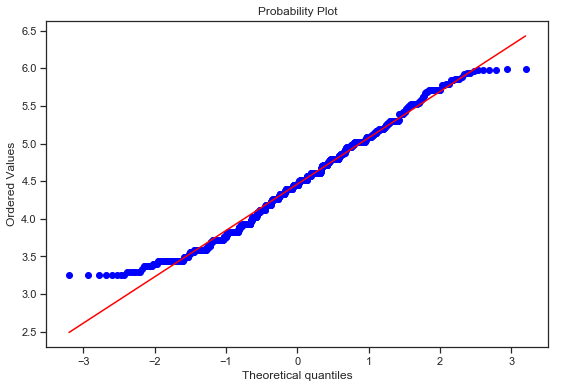

In [37]:
# probability plot
# probplot optionally calculates a best-fit line for the data and plots the results using Matplotlib or a given plot function.
res = stats.probplot(y_log_train_new,plot=plt)

In [38]:
total_corr = train_new.corr()
total_ab_corr = abs(total_corr)
print (total_ab_corr['price'].sort_values(ascending=False), '\n')

price                          1.000000
accommodates                   0.649212
beds                           0.531520
bedrooms                       0.529675
cleaning_fee                   0.520284
bathrooms                      0.472663
guests_included                0.352264
security_deposit               0.299492
host_listings_count            0.236387
longitude                      0.169498
maximum_nights                 0.161332
number_of_reviews              0.092377
extra_people                   0.083662
reviews_per_month              0.077618
review_scores_communication    0.065249
host_identity_verified         0.064429
review_scores_value            0.050687
host_response_rate             0.042345
Id                             0.040323
review_scores_rating           0.037278
review_scores_accuracy         0.033478
review_scores_checkin          0.032305
latitude                       0.027902
review_scores_location         0.017430
review_scores_cleanliness      0.013646


#### Plot relationships diagrams for correlation score above 0.45

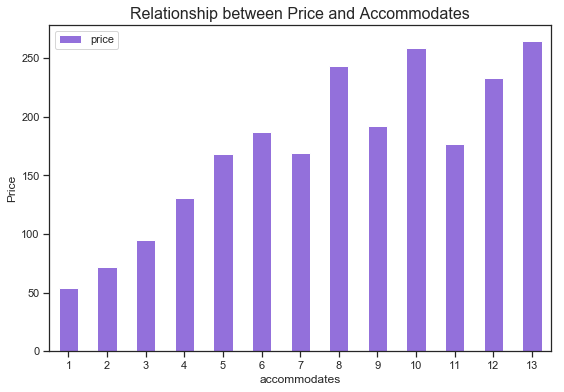

In [39]:
# check the relationship between mean price and accommodates

bedrooms_pivot = train_new.pivot_table(index='accommodates',
                                  values='price', aggfunc=np.mean)
bedrooms_pivot.plot(kind='bar', color='mediumpurple')
plt.xlabel('accommodates')
plt.ylabel('Price')
plt.xticks(rotation=0)
plt.title('Relationship between Price and Accommodates', fontsize = 16)
plt.show()

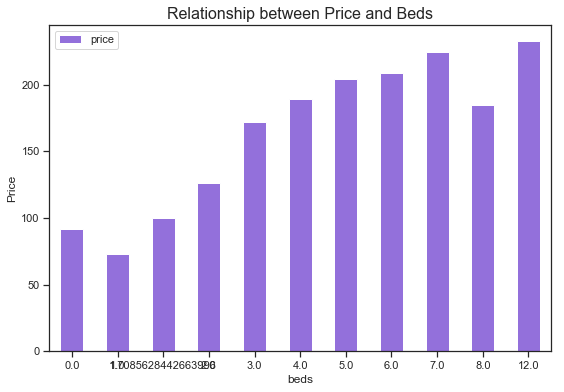

In [40]:
# check the relationship between mean price and beds

bedrooms_pivot = train_new.pivot_table(index='beds',
                                  values='price', aggfunc=np.mean)
bedrooms_pivot.plot(kind='bar', color='mediumpurple')
plt.xlabel('beds')
plt.ylabel('Price')
plt.xticks(rotation=0)
plt.title('Relationship between Price and Beds', fontsize = 16)
plt.show()

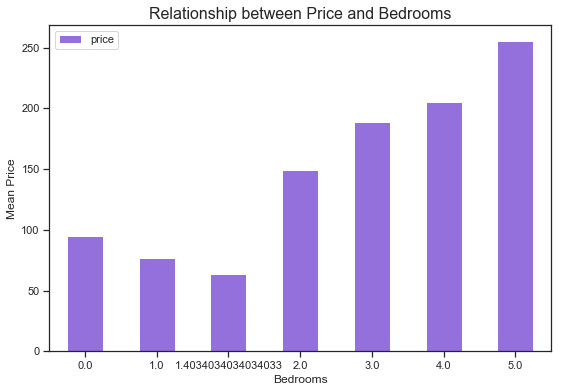

In [41]:
# check the relationship between mean price and bedrooms

bedrooms_pivot = train_new.pivot_table(index='bedrooms',
                                  values='price', aggfunc=np.mean)
bedrooms_pivot.plot(kind='bar', color='mediumpurple')
plt.xlabel('Bedrooms')
plt.ylabel('Mean Price')
plt.xticks(rotation=0)
plt.title('Relationship between Price and Bedrooms', fontsize = 16)
plt.show()

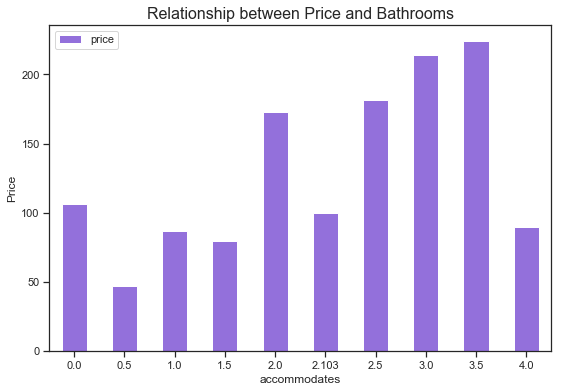

In [42]:
# check the relationship between mean price and bathrooms

bedrooms_pivot = train_new.pivot_table(index='bathrooms',
                                  values='price', aggfunc=np.mean)
bedrooms_pivot.plot(kind='bar', color='mediumpurple')
plt.xlabel('accommodates')
plt.ylabel('Price')
plt.xticks(rotation=0)
plt.title('Relationship between Price and Bathrooms', fontsize = 16)
plt.show()

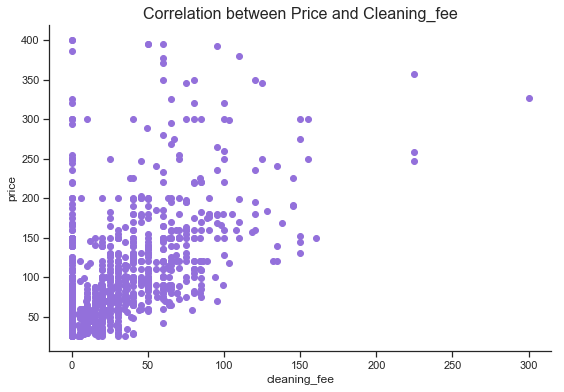

In [43]:
# check the correlation between price and cleaning_fee

plt.scatter(train_new['cleaning_fee'], train_new['price'], c = 'mediumpurple') 
plt.xlabel('cleaning_fee')
plt.ylabel('price')
sns.despine()
plt.title('Correlation between Price and Cleaning_fee', fontsize = 16)
plt.show()

## 2.2 Analysis of Correlation Between Numerical Variables

Text(0.5, 1.0, 'Correlation Among Variables')

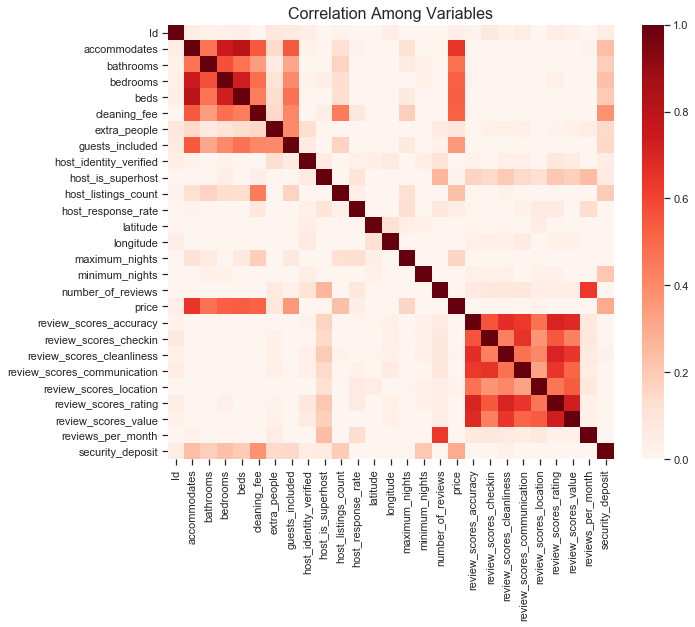

In [44]:
# check the correlation between each numeric feature
plt.figure(figsize = (10,8))
sns.heatmap(train_new.corr(), vmin = 0, vmax = 1, cmap = 'Reds')
plt.title('Correlation Among Variables', fontsize = 16)

###### From heatmap, there are two areas are highly correlated. It is important to check both areas

In [45]:
# create new dataframe for the first area

Room_Related = ['accommodates','bathrooms','bedrooms','beds']

df_Room = pd.DataFrame(train_new[Room_Related])
df_Room.head()

,accommodates,bathrooms,bedrooms,beds
0,4,4.0,1.0,4.0
1,4,2.0,2.0,2.0
2,2,1.0,0.0,0.0
3,3,1.0,0.0,2.0
4,5,2.0,3.0,3.0


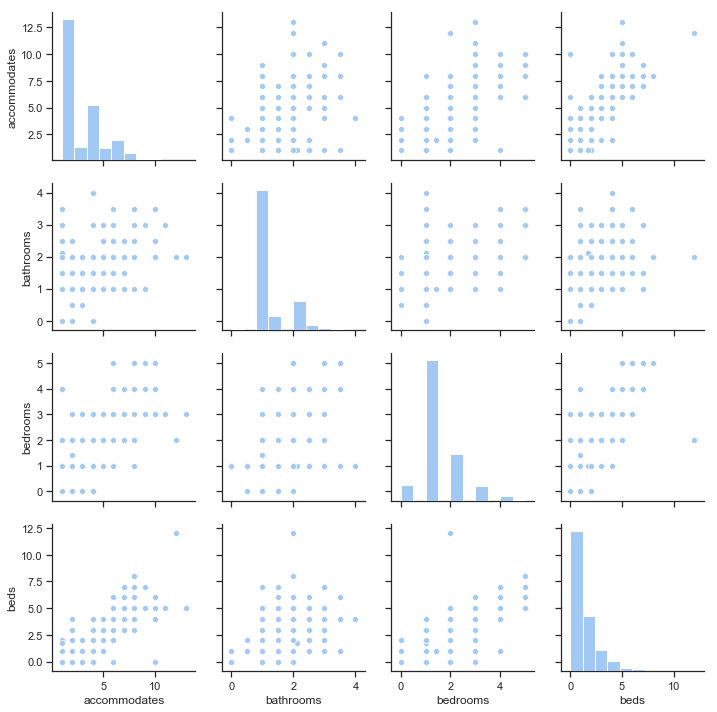

In [46]:
# plot correlation for the first area

sns.pairplot(df_Room)

In [47]:
# # it is clear that accommodates, bathrooms and bedrooms has strong correlation with each other
# So these could be combined into one feature in the feature engineering stage

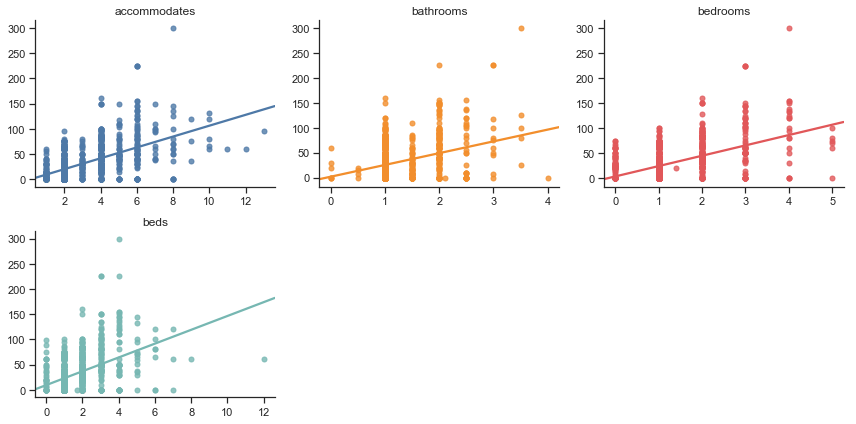

In [48]:
# check relationship between cleaning_fee and Room_Related Variables

with sns.color_palette(crayon):
    plot_regressions(train_new[Room_Related],train_new.cleaning_fee)
    plt.show()

In [49]:
# positive relationship between cleaning_fee and Room_Related Variables, especially bathrooms, bedrooms and beds

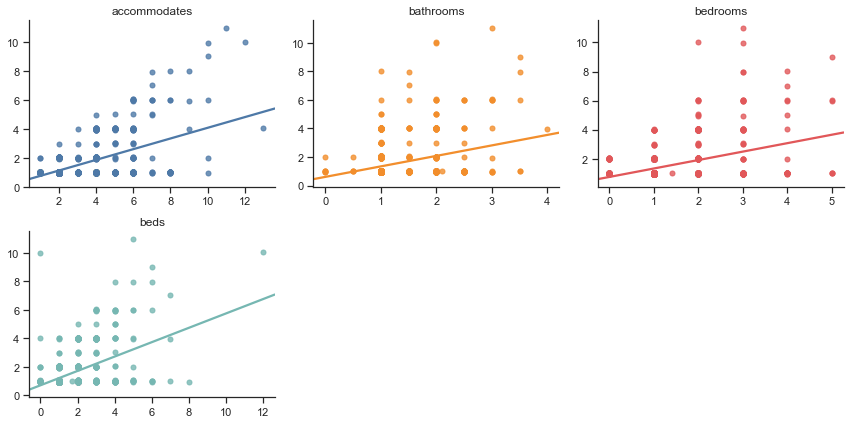

In [50]:
# check relationship between cleaning_fee and Room_Related Variables

with sns.color_palette(crayon):
    plot_regressions(train_new[Room_Related],train_new.guests_included)
    plt.show()

In [51]:
# slight positive relationship between guests_included and Room_Related Variables

In [52]:
# create new dataframe for the review_related variables

Review_ralated = ['review_scores_accuracy', 'review_scores_cleanliness','review_scores_rating',
       'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value']

df_Review = pd.DataFrame(train_new[Review_ralated])
df_Review.head()

,review_scores_accuracy,review_scores_cleanliness,review_scores_rating,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
0,9.000000,8.000000,8.000000,9.000000,9.000000,9.000000,10.000000
1,9.520216,9.282345,9.247273,9.625337,9.640162,9.538098,9.233468
2,10.000000,10.000000,9.700000,10.000000,10.000000,10.000000,10.000000
3,9.000000,9.000000,9.000000,10.000000,10.000000,10.000000,9.000000
4,9.520216,9.282345,9.247273,9.625337,9.640162,9.538098,9.233468


/Users/apple/anaconda3/lib/python3.6/site-packages/matplotlib/legend.py:449: UserWarning: The handle <matplotlib.patches.Patch object at 0x1c1de01e10> has a label of '_nolegend_' which cannot be automatically added to the legend.
  'legend.'.format(handle, label))


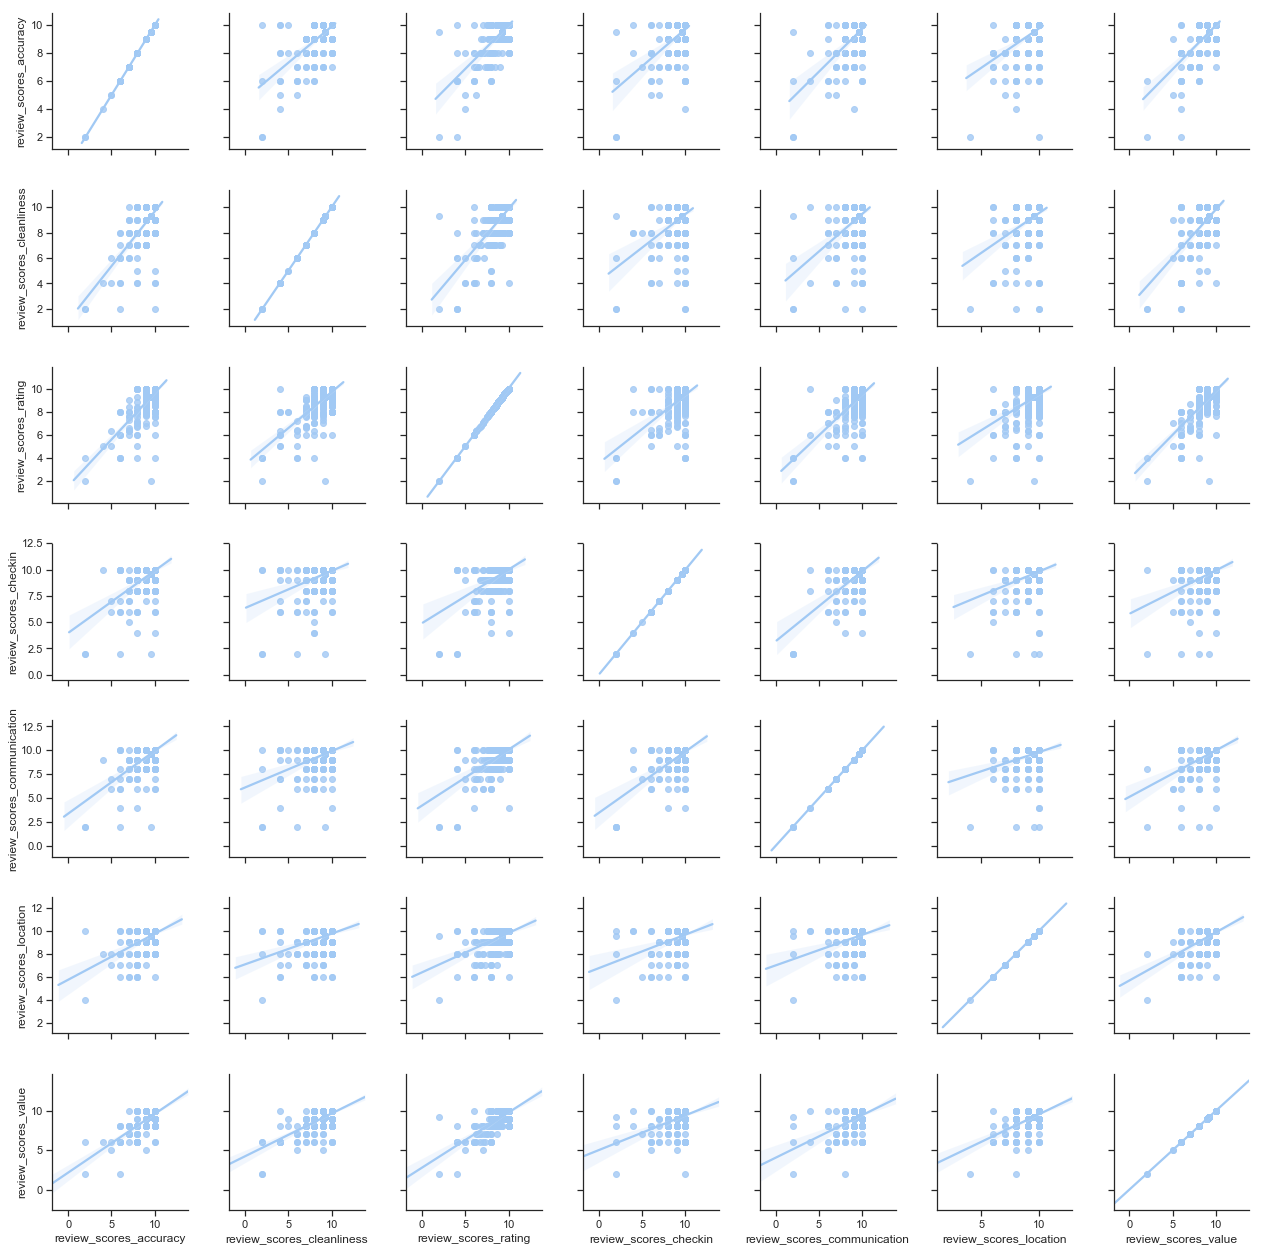

In [53]:
# plot correlation for the review_related variables
sns.set_palette("pastel")
Review_v = sns.PairGrid(df_Review)
Review_v.map(sns.regplot)
Review_v.add_legend();

Text(0.5, 1.0, 'Longitude and Latitude by Price')

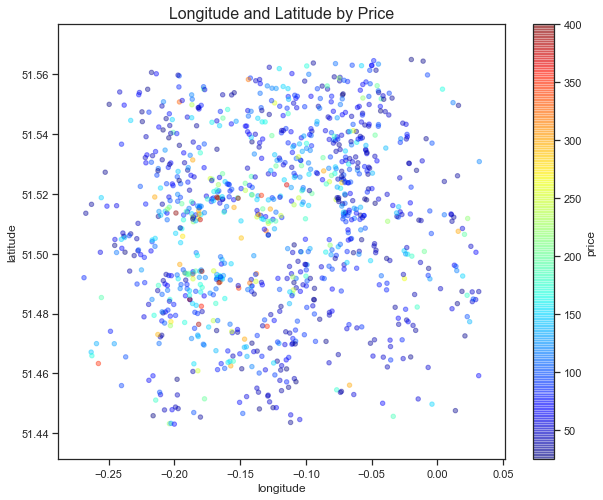

In [54]:
# check the relationship between price, longitude and latitude

train_new.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4, figsize=(10,8),
    c="price", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
plt.title('Longitude and Latitude by Price', fontsize = 16)

## 2.3 Analysis of Correlation Between Categorial Variables 

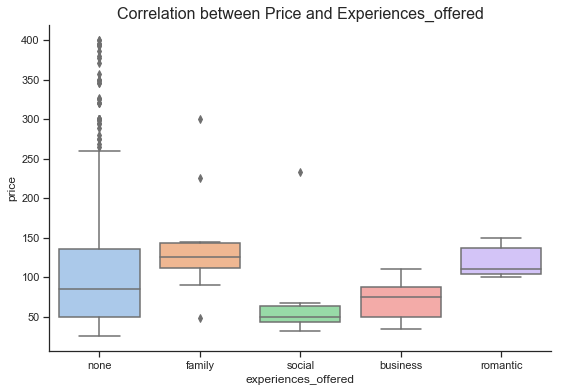

In [55]:
# Boxplot for Experiences Offered
sns.set_palette("pastel")
sns.boxplot(x = 'experiences_offered', y = 'price', data = train_new)
sns.despine()
plt.title('Correlation between Price and Experiences_offered', fontsize = 16)
plt.show()

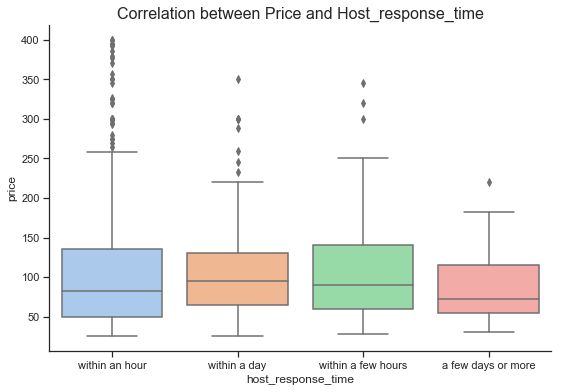

In [56]:
# Boxplot for Host_response_time
sns.set_palette("pastel")
sns.boxplot(x = 'host_response_time', y = 'price', data = train_new)
sns.despine()
plt.title('Correlation between Price and Host_response_time', fontsize = 16)
plt.show()

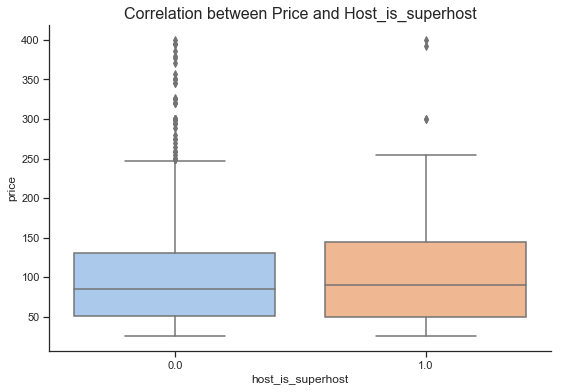

In [57]:
# check the correlation between price and host_is_superhost
sns.set_palette("pastel")
sns.boxplot(x = 'host_is_superhost', y = 'price', data = train_new)
sns.despine()
plt.title('Correlation between Price and Host_is_superhost', fontsize = 16)
plt.show()

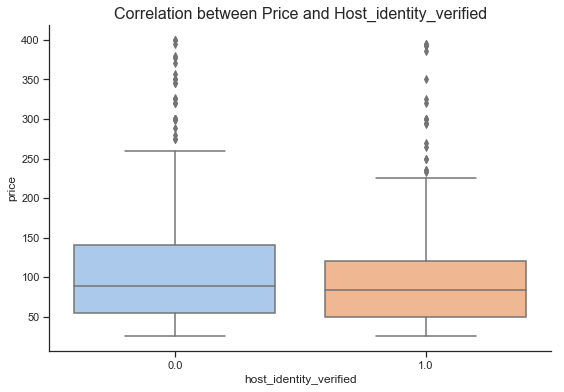

In [58]:
# check the correlation between price and host_identity_verified

sns.boxplot(x = 'host_identity_verified', y = 'price', data = train_new)
sns.despine()
plt.title('Correlation between Price and Host_identity_verified', fontsize = 16)
plt.show()

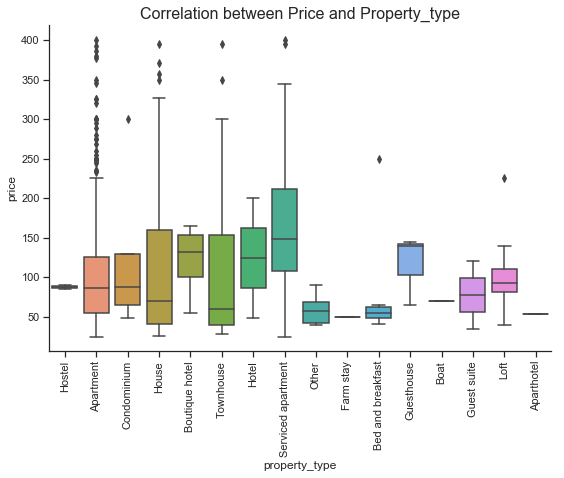

In [59]:
# check the correlation between price and property_type

sns.boxplot(x = 'property_type', y = 'price', data = train_new)
sns.despine()
plt.title('Correlation between Price and Property_type', fontsize = 16)
plt.xticks(rotation='vertical')
plt.show()

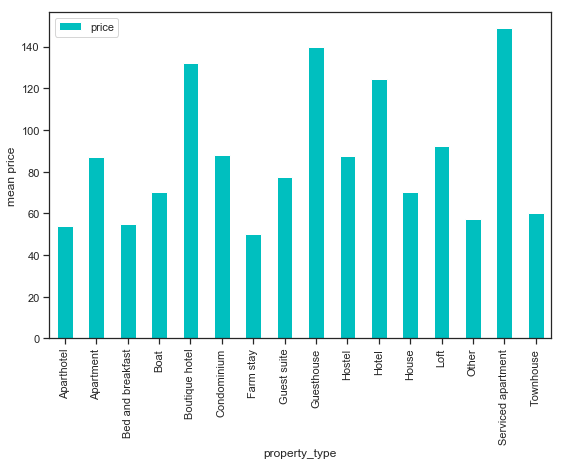

In [60]:
# Check the number of value classes for property_type
property_type_pivot = train_new.pivot_table(index='property_type',
                                    values='price', aggfunc=np.median)
property_type_pivot.plot(kind='bar', color='c')
plt.xlabel('property_type')
plt.ylabel('mean price')
plt.xticks(rotation=90)
plt.show()

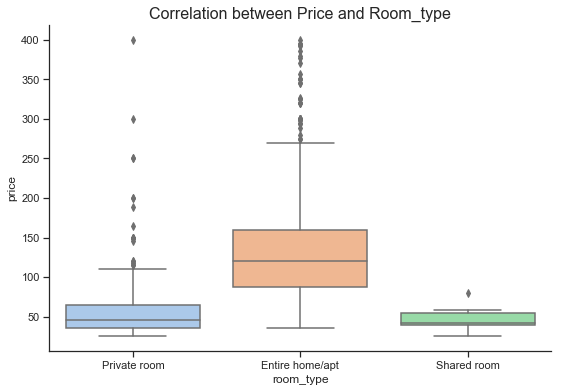

In [61]:
# check the correlation between price and room_type

sns.boxplot(x = 'room_type', y = 'price', data = train_new)
sns.despine()
plt.title('Correlation between Price and Room_type', fontsize = 16)
plt.show()

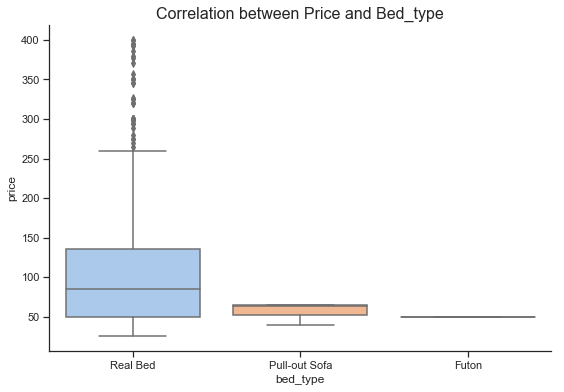

In [62]:
# check the correlation between price and bed_type

sns.boxplot(x = 'bed_type', y = 'price', data = train_new)
sns.despine()
plt.title('Correlation between Price and Bed_type', fontsize = 16)
plt.show()

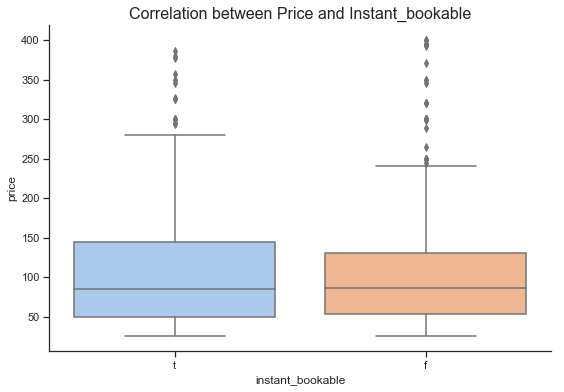

In [63]:
# check the correlation between price and instant_bookable

sns.boxplot(x = 'instant_bookable', y = 'price', data = train_new)
sns.despine()
plt.title('Correlation between Price and Instant_bookable', fontsize = 16)
plt.show()

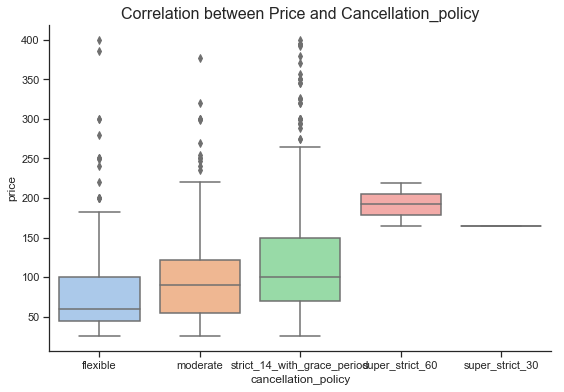

In [64]:
# check the correlation between price and cancellation_policy

sns.boxplot(x = 'cancellation_policy', y = 'price', data = train_new)
sns.despine()
plt.title('Correlation between Price and Cancellation_policy', fontsize = 16)
plt.show()

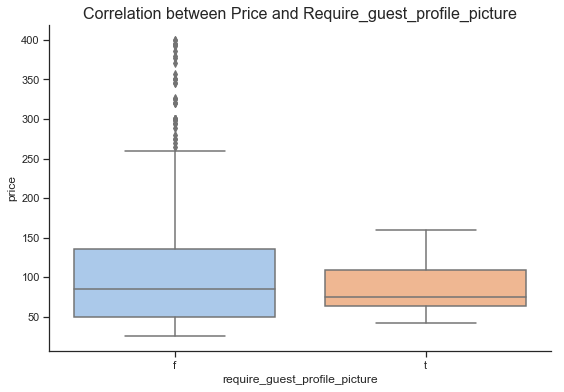

In [65]:
# check the correlation between price and require_guest_profile_picture
sns.boxplot(x = 'require_guest_profile_picture', y = 'price', data = train_new)
sns.despine()
plt.title('Correlation between Price and Require_guest_profile_picture', fontsize = 16)
plt.show()

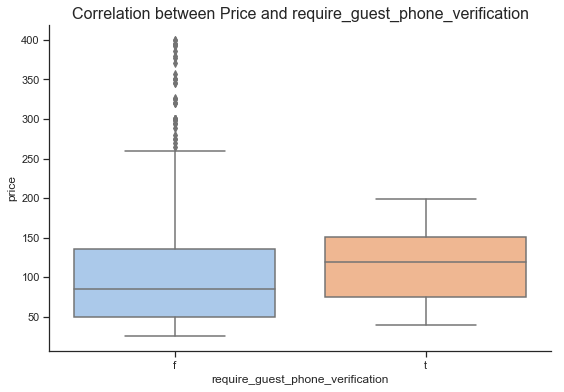

In [66]:
# check the correlation between price and require_guest_phone_verification
sns.boxplot(x = 'require_guest_phone_verification', y = 'price', data = train_new)
sns.despine()
plt.title('Correlation between Price and require_guest_phone_verification', fontsize = 16)
plt.show()

# 3. Feature Engineering

## 3.1 Categorical Variable Engineering

In [67]:
# check the categorical features in Data
category_variables = combined.select_dtypes(exclude=[np.number])
category_variables.describe()

,bed_type,cancellation_policy,experiences_offered,host_response_time,instant_bookable,property_type,require_guest_phone_verification,require_guest_profile_picture,room_type
count,2000,2000,2000,2000,2000,2000,2000,2000,2000
unique,5,5,5,4,2,19,2,2,3
top,Real Bed,strict_14_with_grace_period,none,within an hour,f,Apartment,f,f,Entire home/apt
freq,1984,876,1931,1498,1229,1506,1964,1982,1220


### 3.1.1 Reduce the Number of Value Classes in Categorical Variable

In [68]:
# count the values in 'property_type'

print(combined['property_type'].value_counts())
print(len(combined['property_type'].value_counts()))

Apartment             1506
House                  269
Townhouse               71
Serviced apartment      63
Condominium             24
Loft                    15
Bed and breakfast       13
Other                    9
Guesthouse               5
Guest suite              5
Boutique hotel           5
Hostel                   4
Boat                     3
Cottage                  2
Hotel                    2
Aparthotel               1
Treehouse                1
Farm stay                1
Villa                    1
Name: property_type, dtype: int64
19


In [69]:
# classify values

combined['property_type'] = combined['property_type'].replace('Condominium', 'Other')
combined['property_type'] = combined['property_type'].replace('Loft', 'Other')
combined['property_type'] = combined['property_type'].replace('Bed and breakfast', 'Other')
combined['property_type'] = combined['property_type'].replace('Boutique hotel', 'Other')
combined['property_type'] = combined['property_type'].replace('Guesthouse', 'Other')
combined['property_type'] = combined['property_type'].replace('Hotel', 'Other')
combined['property_type'] = combined['property_type'].replace('Guest suite', 'Other')
combined['property_type'] = combined['property_type'].replace('Hostel', 'Other')
combined['property_type'] = combined['property_type'].replace('Farm stay', 'Other')
combined['property_type'] = combined['property_type'].replace('Boat', 'Other')
combined['property_type'] = combined['property_type'].replace('Aparthotel', 'Other')
combined['property_type'] = combined['property_type'].replace('Townhouse', 'House')


In [70]:
# count the values in 'property_type'
print(combined['property_type'].value_counts())
print(len(combined['property_type'].value_counts()))

Apartment             1506
House                  340
Other                   87
Serviced apartment      63
Cottage                  2
Villa                    1
Treehouse                1
Name: property_type, dtype: int64
7


### 3.1.2 Get Dummy

In [71]:
combined.host_is_superhost.value_counts()

0.0    1743
1.0     257
Name: host_is_superhost, dtype: int64

In [72]:
combined.host_identity_verified.value_counts()

0.0    1228
1.0     772
Name: host_identity_verified, dtype: int64

In [73]:
combined['instant_bookable']=combined.instant_bookable.map({"f":0,"t":1})

In [74]:
# instant_bookable

combined.instant_bookable.value_counts()

0    1229
1     771
Name: instant_bookable, dtype: int64

In [75]:
combined['require_guest_profile_picture']=combined.require_guest_profile_picture.map({"f":0,"t":1})

In [76]:
# require_guest_profile_picture
combined.instant_bookable.value_counts()

0    1229
1     771
Name: instant_bookable, dtype: int64

In [77]:
combined['require_guest_phone_verification']=combined.require_guest_phone_verification.map({"f":0,"t":1})

In [78]:
# require_guest_phone_verification
combined.instant_bookable.value_counts()

0    1229
1     771
Name: instant_bookable, dtype: int64

In [79]:
# experiences_offered
combined.experiences_offered.value_counts()

none        1931
family        25
social        19
business      15
romantic      10
Name: experiences_offered, dtype: int64

In [80]:
dummy_experiences_offered = pd.get_dummies(combined['experiences_offered'])
combined = pd.concat([combined, dummy_experiences_offered], axis=1)

In [81]:
# host_response_time
combined.host_response_time.value_counts()

within an hour        1498
within a few hours     260
within a day           196
a few days or more      46
Name: host_response_time, dtype: int64

In [82]:
dummy_host_response_time = pd.get_dummies(combined['host_response_time'])
combined = pd.concat([combined, dummy_host_response_time], axis=1)

In [83]:
# bed_type
combined.bed_type.value_counts()

Real Bed         1984
Pull-out Sofa      10
Futon               3
Couch               2
Airbed              1
Name: bed_type, dtype: int64

In [84]:
dummy_bed_type = pd.get_dummies(combined['bed_type'])
combined = pd.concat([combined, dummy_bed_type], axis=1)

In [85]:
# cancellation_policy
combined.cancellation_policy.value_counts()

strict_14_with_grace_period    876
flexible                       610
moderate                       499
super_strict_30                 11
super_strict_60                  4
Name: cancellation_policy, dtype: int64

In [86]:
dummy_cancellation_policy= pd.get_dummies(combined['cancellation_policy'])
combined = pd.concat([combined, dummy_cancellation_policy], axis=1)

In [87]:
# property_type
dummy_property_type = pd.get_dummies(combined['property_type'])
combined = pd.concat([combined, dummy_property_type], axis=1)

In [88]:
# room_type
combined.room_type.value_counts()

Entire home/apt    1220
Private room        768
Shared room          12
Name: room_type, dtype: int64

In [89]:
dummy_room_type = pd.get_dummies(combined['room_type'])
combined = pd.concat([combined, dummy_room_type], axis=1)

In [90]:
# review_scores_value
combined.review_scores_value.value_counts()

10.000000    695
9.000000     568
9.233468     518
8.000000     152
6.000000      32
7.000000      25
5.000000       5
2.000000       3
4.000000       2
Name: review_scores_value, dtype: int64

In [91]:
combined.head()

,Id,accommodates,bathrooms,bed_type,bedrooms,beds,cancellation_policy,cleaning_fee,experiences_offered,extra_people,...,Apartment,Cottage,House,Other,Serviced apartment,Treehouse,Villa,Entire home/apt,Private room,Shared room
0,0,4,2.0,Real Bed,2.0,2.0,moderate,84.0,none,15,...,1,0,0,0,0,0,0,1,0,0
1,1,5,2.0,Real Bed,2.0,3.0,strict_14_with_grace_period,0.0,none,0,...,1,0,0,0,0,0,0,1,0,0
2,2,6,2.0,Real Bed,3.0,4.0,moderate,0.0,none,10,...,1,0,0,0,0,0,0,1,0,0
3,3,2,1.0,Real Bed,2.0,2.0,moderate,0.0,none,0,...,1,0,0,0,0,0,0,1,0,0
4,4,4,1.5,Real Bed,2.0,2.0,moderate,95.0,none,0,...,1,0,0,0,0,0,0,1,0,0


## 3.2 Analysis of Correlation Between Numerical Variables

### 3.2.1 Drop irrelevant variable

In [92]:
# remove irrelative value 'Id'
combined= combined.drop(columns="Id")
combined.head()

,accommodates,bathrooms,bed_type,bedrooms,beds,cancellation_policy,cleaning_fee,experiences_offered,extra_people,guests_included,...,Apartment,Cottage,House,Other,Serviced apartment,Treehouse,Villa,Entire home/apt,Private room,Shared room
0,4,2.0,Real Bed,2.0,2.0,moderate,84.0,none,15,2,...,1,0,0,0,0,0,0,1,0,0
1,5,2.0,Real Bed,2.0,3.0,strict_14_with_grace_period,0.0,none,0,1,...,1,0,0,0,0,0,0,1,0,0
2,6,2.0,Real Bed,3.0,4.0,moderate,0.0,none,10,6,...,1,0,0,0,0,0,0,1,0,0
3,2,1.0,Real Bed,2.0,2.0,moderate,0.0,none,0,1,...,1,0,0,0,0,0,0,1,0,0
4,4,1.5,Real Bed,2.0,2.0,moderate,95.0,none,0,1,...,1,0,0,0,0,0,0,1,0,0


### 3.2.2 Columns  restructure

In [93]:
# Rescale the four room_related variables
Room = combined["accommodates"]/13+combined["bathrooms"]/4+combined["bedrooms"]/5+combined["beds"]/12
# Create another data column by
combined['room'] = Room
Room.head()

0    1.374359
1    1.534615
2    1.894872
3    0.970513
4    1.249359
dtype: float64

In [94]:
# Use variable "Room" and drop 'accommodates','bathrooms','bedrooms','beds'
combined =combined.drop(['accommodates','bathrooms','bedrooms','beds'],axis=1)
combined.head()

,bed_type,cancellation_policy,cleaning_fee,experiences_offered,extra_people,guests_included,host_identity_verified,host_is_superhost,host_listings_count,host_response_rate,...,Cottage,House,Other,Serviced apartment,Treehouse,Villa,Entire home/apt,Private room,Shared room,room
0,Real Bed,moderate,84.0,none,15,2,0.0,0.0,1.0,1.00,...,0,0,0,0,0,0,1,0,0,1.374359
1,Real Bed,strict_14_with_grace_period,0.0,none,0,1,1.0,0.0,62.0,0.94,...,0,0,0,0,0,0,1,0,0,1.534615
2,Real Bed,moderate,0.0,none,10,6,0.0,0.0,5.0,1.00,...,0,0,0,0,0,0,1,0,0,1.894872
3,Real Bed,moderate,0.0,none,0,1,0.0,0.0,1.0,0.90,...,0,0,0,0,0,0,1,0,0,0.970513
4,Real Bed,moderate,95.0,none,0,1,0.0,1.0,150.0,1.00,...,0,0,0,0,0,0,1,0,0,1.249359


In [95]:
# Rescale the seven room_related variables
review_scores=(combined['review_scores_rating']+ combined['review_scores_accuracy']+combined['review_scores_cleanliness']+combined['review_scores_checkin']+combined['review_scores_communication']+combined['review_scores_location']+combined['review_scores_value'])/7
# Create another data column by
combined['review_score'] = review_scores
review_scores.head()                           
                           
                           

0    10.000000
1     7.428571
2     9.440986
3     9.000000
4     9.985714
dtype: float64

In [96]:
# Use variable "review_scores" and drop 'review_scores_rating','review_scores_accuracy',
#'review_scores_cleanliness','review_scores_checkin','review_scores_communication', 
#'review_scores_location','review_scores_value'
combined = combined.drop(['review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication', 'review_scores_location','review_scores_value'],axis=1)
combined.head()

,bed_type,cancellation_policy,cleaning_fee,experiences_offered,extra_people,guests_included,host_identity_verified,host_is_superhost,host_listings_count,host_response_rate,...,House,Other,Serviced apartment,Treehouse,Villa,Entire home/apt,Private room,Shared room,room,review_score
0,Real Bed,moderate,84.0,none,15,2,0.0,0.0,1.0,1.00,...,0,0,0,0,0,1,0,0,1.374359,10.000000
1,Real Bed,strict_14_with_grace_period,0.0,none,0,1,1.0,0.0,62.0,0.94,...,0,0,0,0,0,1,0,0,1.534615,7.428571
2,Real Bed,moderate,0.0,none,10,6,0.0,0.0,5.0,1.00,...,0,0,0,0,0,1,0,0,1.894872,9.440986
3,Real Bed,moderate,0.0,none,0,1,0.0,0.0,1.0,0.90,...,0,0,0,0,0,1,0,0,0.970513,9.000000
4,Real Bed,moderate,95.0,none,0,1,0.0,1.0,150.0,1.00,...,0,0,0,0,0,1,0,0,1.249359,9.985714


### 3.2.3 Change latitude and longtitude to a new vairable "Distance"

In [97]:
# choose Hyde Park as the centre point 
latitude_park = 51.5073
longitude_park = 0.1657

In [98]:
# create a new feature: Distance
combined['Distance'] = np.sqrt((latitude_park - combined['latitude'])**2 + (longitude_park - combined['longitude'])**2)
combined.head()

,bed_type,cancellation_policy,cleaning_fee,experiences_offered,extra_people,guests_included,host_identity_verified,host_is_superhost,host_listings_count,host_response_rate,...,Other,Serviced apartment,Treehouse,Villa,Entire home/apt,Private room,Shared room,room,review_score,Distance
0,Real Bed,moderate,84.0,none,15,2,0.0,0.0,1.0,1.00,...,0,0,0,0,1,0,0,1.374359,10.000000,0.337880
1,Real Bed,strict_14_with_grace_period,0.0,none,0,1,1.0,0.0,62.0,0.94,...,0,0,0,0,1,0,0,1.534615,7.428571,0.312394
2,Real Bed,moderate,0.0,none,10,6,0.0,0.0,5.0,1.00,...,0,0,0,0,1,0,0,1.894872,9.440986,0.346207
3,Real Bed,moderate,0.0,none,0,1,0.0,0.0,1.0,0.90,...,0,0,0,0,1,0,0,0.970513,9.000000,0.234535
4,Real Bed,moderate,95.0,none,0,1,0.0,1.0,150.0,1.00,...,0,0,0,0,1,0,0,1.249359,9.985714,0.361219


In [99]:
# drop overlapped columns

combined_1 = combined.drop(['experiences_offered','host_response_time','bed_type','room_type','cancellation_policy','property_type','longitude','latitude'],axis=1)
combined_1.head()

,cleaning_fee,extra_people,guests_included,host_identity_verified,host_is_superhost,host_listings_count,host_response_rate,instant_bookable,maximum_nights,minimum_nights,...,Other,Serviced apartment,Treehouse,Villa,Entire home/apt,Private room,Shared room,room,review_score,Distance
0,84.0,15,2,0.0,0.0,1.0,1.00,0,21,2,...,0,0,0,0,1,0,0,1.374359,10.000000,0.337880
1,0.0,0,1,1.0,0.0,62.0,0.94,0,1125,6,...,0,0,0,0,1,0,0,1.534615,7.428571,0.312394
2,0.0,10,6,0.0,0.0,5.0,1.00,1,1125,1,...,0,0,0,0,1,0,0,1.894872,9.440986,0.346207
3,0.0,0,1,0.0,0.0,1.0,0.90,0,1125,7,...,0,0,0,0,1,0,0,0.970513,9.000000,0.234535
4,95.0,0,1,0.0,1.0,150.0,1.00,0,1125,3,...,0,0,0,0,1,0,0,1.249359,9.985714,0.361219


## 3.3 Log Transforamtion

In [100]:
# check the skewness of variables
combined_1.skew().sort_values(ascending=False)

Villa                               44.721360
Airbed                              44.721360
Treehouse                           44.721360
Cottage                             31.599027
Couch                               31.599027
Futon                               25.781098
super_strict_60                     22.310278
romantic                            14.046385
Pull-out Sofa                       14.046385
super_strict_30                     13.382537
Shared room                         12.803068
business                            11.425264
require_guest_profile_picture       10.405892
social                              10.120591
minimum_nights                       9.461575
family                               8.782274
require_guest_phone_verification     7.256228
host_listings_count                  6.947538
security_deposit                     6.539015
a few days or more                   6.368880
Serviced apartment                   5.368592
number_of_reviews                 

In [101]:
# Do the log transformation for skewness above 0，excluding the value of variables (0/1)
combined_1[['price','room','cleaning_fee','number_of_reviews','reviews_per_month',
            'extra_people','guests_included','security_deposit','host_listings_count','minimum_nights']]=np.log1p(combined_1[['price','room','cleaning_fee','number_of_reviews','reviews_per_month',
            'extra_people','guests_included','security_deposit','host_listings_count','minimum_nights']])

/Users/apple/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log1p
  after removing the cwd from sys.path.


In [102]:
# Recheck the skewness of variables
combined_1.skew().sort_values(ascending=False)

Villa                               44.721360
Airbed                              44.721360
Treehouse                           44.721360
Cottage                             31.599027
Couch                               31.599027
Futon                               25.781098
super_strict_60                     22.310278
romantic                            14.046385
Pull-out Sofa                       14.046385
super_strict_30                     13.382537
Shared room                         12.803068
business                            11.425264
require_guest_profile_picture       10.405892
social                              10.120591
family                               8.782274
require_guest_phone_verification     7.256228
a few days or more                   6.368880
Serviced apartment                   5.368592
Other                                4.479294
within a day                         2.706236
minimum_nights                       2.316393
host_is_superhost                 

## 3.4 Re-check Correlations

Text(0.5, 1.0, 'Correlation Between Variables')

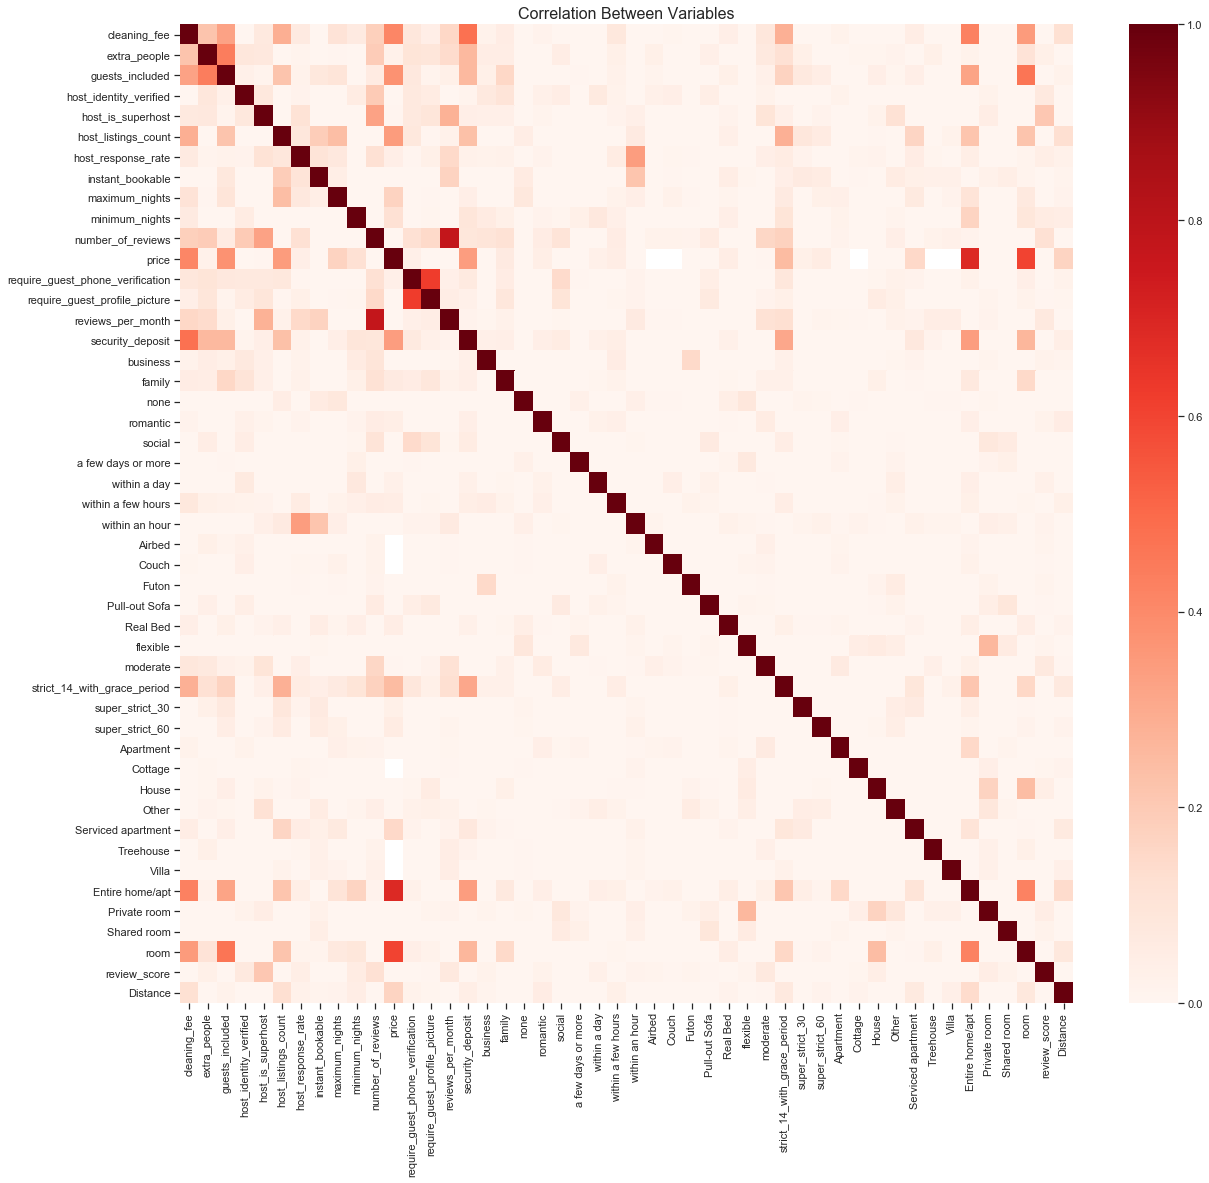

In [103]:
# use heatmap to recheck the correlation
plt.figure(figsize = (20,18))
sns.heatmap(combined_1.corr(), vmin = 0, vmax = 1,  cmap = 'Reds')
plt.title('Correlation Between Variables', fontsize = 16)

In [104]:
total_corr_2 = combined_1.corr()
total_ab_corr_2 = abs(total_corr_2)
print (total_ab_corr_2['price'].sort_values(ascending=False), '\n')

price                               1.000000
Entire home/apt                     0.687678
Private room                        0.677017
room                                0.602111
cleaning_fee                        0.412660
guests_included                     0.378140
host_listings_count                 0.344730
security_deposit                    0.340078
flexible                            0.271928
strict_14_with_grace_period         0.246211
maximum_nights                      0.168406
Distance                            0.166633
Serviced apartment                  0.150648
minimum_nights                      0.117842
number_of_reviews                   0.082309
Shared room                         0.079039
family                              0.065077
social                              0.064647
host_identity_verified              0.057612
super_strict_60                     0.057382
reviews_per_month                   0.051138
within a few hours                  0.049531
within an 

## 3.5 Drop Less Related Columns

In [105]:
# Drop variables with correlation score less than 0.05
combined_2= combined_1.drop(['Airbed','Couch','Cottage','Treehouse','Villa','none','host_is_superhost','moderate','instant_bookable',
                  'require_guest_profile_picture','Apartment','Other','a few days or more','extra_people','Futon','within a day',
                 'super_strict_30','review_score','business','Pull-out Sofa','require_guest_phone_verification','host_response_rate',
                 'House','romantic','Real Bed','within an hour'],axis=1)
combined_2.head()



,cleaning_fee,guests_included,host_identity_verified,host_listings_count,maximum_nights,minimum_nights,number_of_reviews,price,reviews_per_month,security_deposit,...,within a few hours,flexible,strict_14_with_grace_period,super_strict_60,Serviced apartment,Entire home/apt,Private room,Shared room,room,Distance
0,4.442651,1.098612,0.0,0.693147,21,1.098612,2.564949,NaN,0.524729,4.454347,...,0,0,0,0,0,1,0,0,0.864727,0.337880
1,0.000000,0.693147,1.0,4.143135,1125,1.945910,0.693147,NaN,0.122218,0.000000,...,1,0,1,0,0,1,0,0,0.930042,0.312394
2,0.000000,1.945910,0.0,1.791759,1125,0.693147,0.000000,NaN,0.000000,0.000000,...,0,0,0,0,0,1,0,0,1.062941,0.346207
3,0.000000,0.693147,0.0,0.693147,1125,2.079442,1.098612,NaN,0.182322,0.000000,...,1,0,0,0,0,1,0,0,0.678294,0.234535
4,4.564348,0.693147,0.0,5.017280,1125,1.386294,2.833213,NaN,0.457425,5.303305,...,0,0,0,0,0,1,0,0,0.810645,0.361219


In [106]:
combined_2.isna().sum().sort_values(ascending=False)

price                          1000
Distance                          0
room                              0
guests_included                   0
host_identity_verified            0
host_listings_count               0
maximum_nights                    0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
security_deposit                  0
family                            0
social                            0
within a few hours                0
flexible                          0
strict_14_with_grace_period       0
super_strict_60                   0
Serviced apartment                0
Entire home/apt                   0
Private room                      0
Shared room                       0
cleaning_fee                      0
dtype: int64

## 3.6 Split Training Data and Testing Data


In [107]:
Response = 'price'
Predictors = list(combined_2.drop(['price'],axis = 1))

test_new_1 = combined_2[:1000]
train_new_1 = combined_2[1000:]

In [108]:
list(train_new_1.columns.values)

['cleaning_fee',
 'guests_included',
 'host_identity_verified',
 'host_listings_count',
 'maximum_nights',
 'minimum_nights',
 'number_of_reviews',
 'price',
 'reviews_per_month',
 'security_deposit',
 'family',
 'social',
 'within a few hours',
 'flexible',
 'strict_14_with_grace_period',
 'super_strict_60',
 'Serviced apartment',
 'Entire home/apt',
 'Private room',
 'Shared room',
 'room',
 'Distance']

## 3.7 Check Outliers

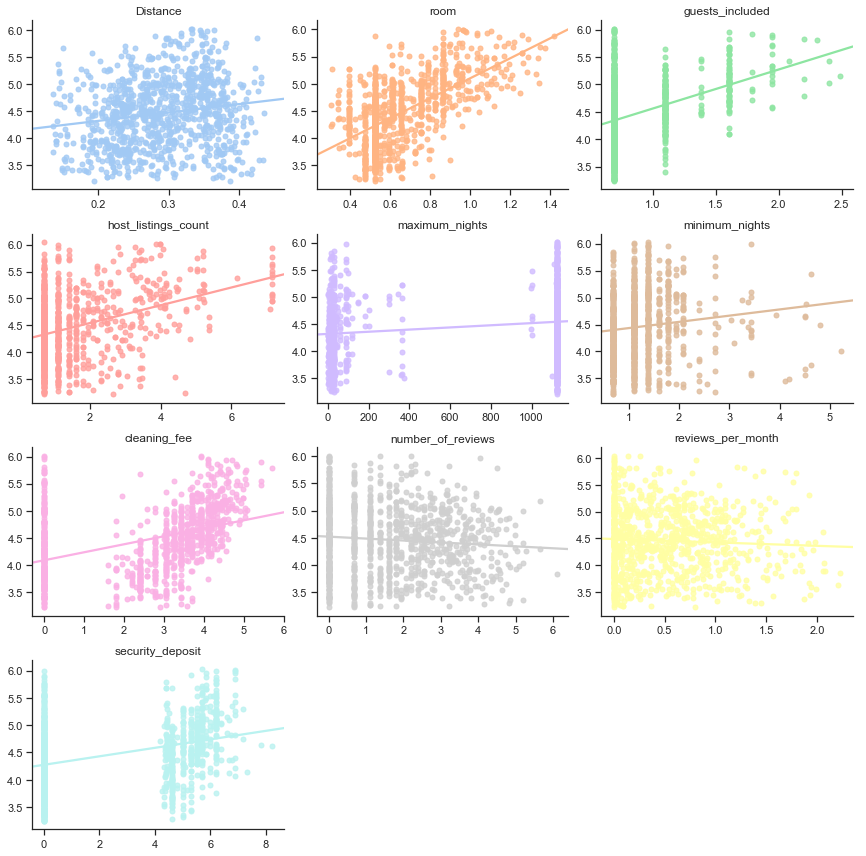

In [109]:
# plot relationship for variables that values are not 0/1 in train_new_1 dataframe.

Numerical_train_new1 = ['Distance','room','guests_included','host_listings_count','maximum_nights','minimum_nights','cleaning_fee',
        'number_of_reviews','reviews_per_month','security_deposit']

plot_regressions(train_new_1[Numerical_train_new1], y=train_new_1['price'])
plt.show()

In [110]:
# There are no obvious outliers

In [111]:
train_new_1.shape

(1000, 22)

In [112]:
test_new_1.shape

(1000, 22)

In [113]:
Response = 'price'
Predictors = list(train_new_1.drop(['price'],axis = 1))

y_test = test_new_1[Response]
y_train = train_new_1[Response]
x_test = test_new_1[Predictors]
x_train = train_new_1[Predictors]



In [114]:
train_new_1[Response].shape

(1000,)

# Interpertation Model

In [115]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score,  mean_absolute_error

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, ElasticNetCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor
import xgboost as xgb
import lightgbm as lgb
from mlxtend.regressor import StackingCVRegressor

/Users/apple/anaconda3/lib/python3.6/site-packages/lightgbm/__init__.py:46: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_8.3.3) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)


In [116]:
scaler = StandardScaler()
x_scaler = scaler.fit_transform(x_train)
x_test_scaler = scaler.fit_transform(x_test)

/Users/apple/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/apple/anaconda3/lib/python3.6/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/Users/apple/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/apple/anaconda3/lib/python3.6/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


## OLS

In [117]:
ols = LinearRegression(fit_intercept = True)
reg = ols.fit(x_train, y_train)
print(reg.coef_)
print(reg.intercept_)

[ 3.44297651e-03  4.40089584e-02 -2.81375015e-02  4.44324045e-02
  6.05774718e-05 -2.39931859e-02 -4.31124720e-02  2.66315853e-02
  7.50476823e-03  1.52015845e-02  8.44174651e-02  1.43103251e-02
 -5.24941870e-03  3.43594397e-02  5.29300169e-01  1.26869145e-01
  4.34831692e-01 -1.78697362e-01 -2.56134330e-01  1.06742903e+00
  5.26294454e-01]
3.327317059103505


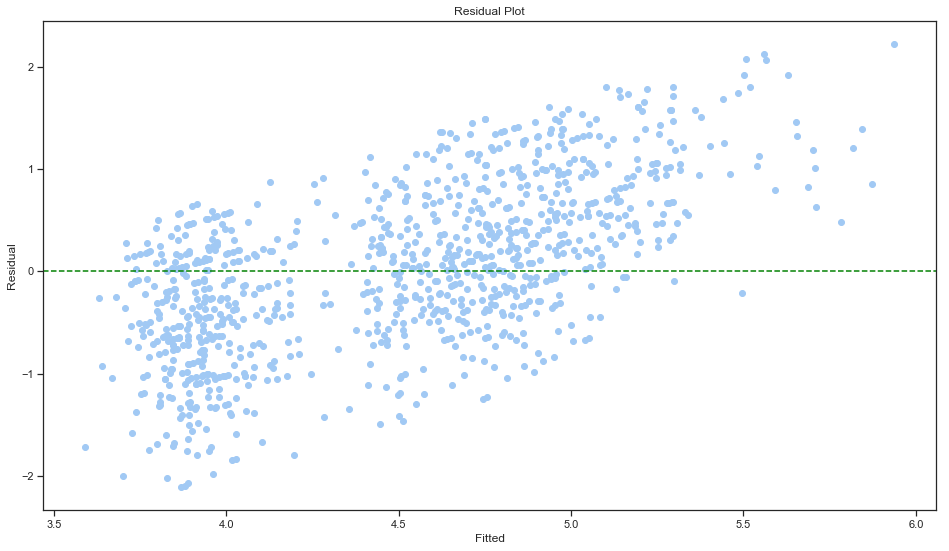

In [118]:
train_y_pred = reg.predict(x_test)
resid = train_y_pred-y_train


plt.figure(figsize = (16,9))
plt.scatter(train_y_pred,resid)
plt.axhline(0,0,1,color = "g",ls = "--")
plt.xlabel("Fitted")
plt.ylabel("Residual")
plt.title("Residual Plot")
plt.savefig("Residual plot ols")
plt.show()

/Users/apple/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


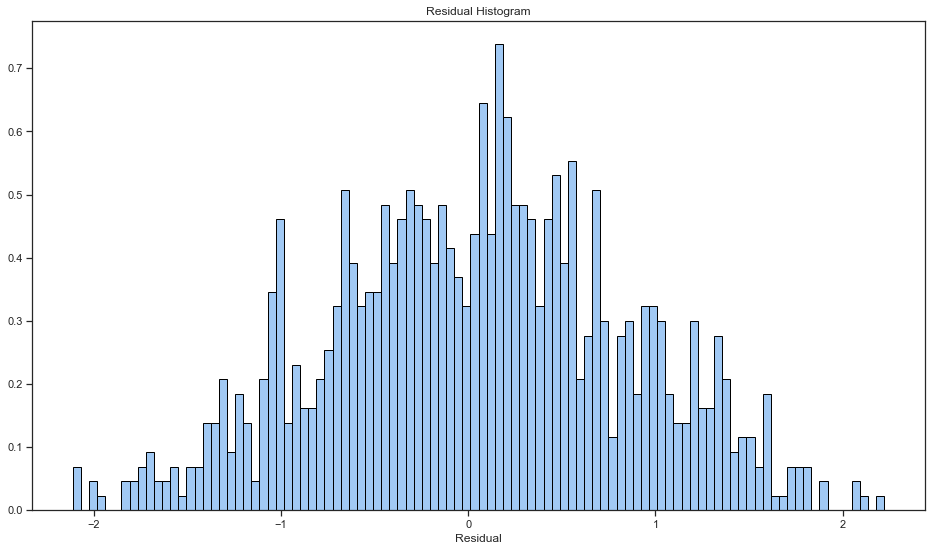

In [119]:
# import matplotlib.mlab as mlab  

plt.figure(figsize = (16,9))
n, bins, patches = plt.hist(resid, bins = 100,normed = True,edgecolor = 'k')
# y = mlab.normpdf(bins, mu, sigma)  
# plt.plot(bins, y, 'r--')  
plt.xlabel("Residual")
plt.title("Residual Histogram")
plt.savefig("Residual Histogram ols")
plt.show()
 

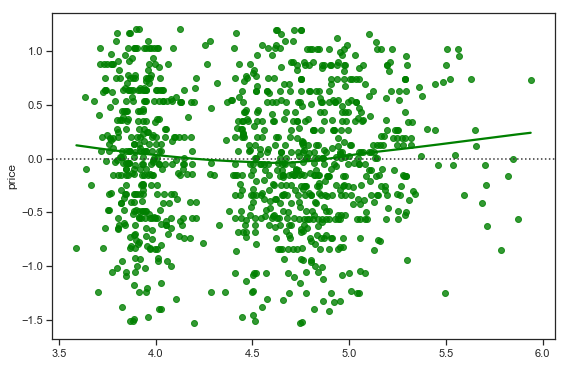

In [120]:
import seaborn as sns
sns.residplot(train_y_pred, train_y_pred-y_train, lowess=True, color="g")

In [121]:
y_pred_ols = reg.predict(x_test)
# RMSE_ols1 = rmse(np.exp(y_pred_ols), y_test)
# print("RMSE",RMSE_ols1)
# r2_ols1 = r2_score(y_test,y_pred_ols)
# print("R2",r2_ols1)

In [122]:
submission = pd.DataFrame(np.c_[x_train.index, np.exp(y_pred_ols)-1], columns=['Id', Response])
submission['Id'] = submission['Id'].astype(int)
submission.to_csv('kaggle_submission.csv',  index=False)

# RMSE = 44.23719

In [123]:
submission

,Id,price
0,0,129.214858
1,1,171.306124
2,2,198.484773
3,3,104.739235
4,4,155.246583
5,5,87.700902
6,6,86.319934
7,7,135.930265
8,8,89.307324
9,9,83.783369


## LASSO

In [124]:
alpha = list(np.logspace(-10, 10, 100, base=2))

lasso = Pipeline((
    ('scaler', StandardScaler()),
    ('estimator', LassoCV(cv=5,random_state=0,alphas = alpha)),
))

lasso.fit(x_train, y_train)

/Users/apple/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/apple/anaconda3/lib/python3.6/site-packages/sklearn/base.py:467: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('estimator', LassoCV(alphas=[0.0009765625, 0.0011233476571973669, 0.0012921957979451526, 0.0014864231651962546, 0.001709844459752558, 0.001966847762467772, 0.0022624807178568238, 0.0026025496717912854, 0.002993733710383632...e=False,
    precompute='auto', random_state=0, selection='cyclic', tol=0.0001,
    verbose=False))])

In [125]:
y_pred_lasso= lasso.predict(x_test)

/Users/apple/anaconda3/lib/python3.6/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


In [126]:
submission = pd.DataFrame(np.c_[x_train.index, np.exp(y_pred_lasso)-1], columns=['Id', Response])
submission['Id'] = submission['Id'].astype(int)
submission.to_csv('kaggle_submission.csv',  index=False)

# RMSE = 44.42

In [127]:
submission

,Id,price
0,0,129.639743
1,1,169.343582
2,2,193.199128
3,3,104.558714
4,4,157.101269
5,5,88.619755
6,6,86.967932
7,7,135.198555
8,8,90.804342
9,9,83.798969


In [128]:
reg = LassoCV(cv=5, random_state=0, alphas = alpha).fit(x_scaler, y_train)

In [129]:
reg.alpha_

0.005241670654642098

In [130]:
reg.coef_

array([ 0.00525082,  0.0124369 , -0.01187924,  0.05930901,  0.02877774,
       -0.00909495, -0.04297991,  0.        ,  0.01797507,  0.        ,
        0.00095307,  0.        , -0.        ,  0.01395847,  0.01909173,
        0.01963379,  0.29840131, -0.        , -0.00111114,  0.21403763,
        0.03085725])

In [131]:
reg.intercept_

4.460110270735019

# Ridge Regression


In [132]:
alphas = list(np.logspace(-10, 10, 101, base=2))

ridge = Pipeline((
    ('scaler', StandardScaler()),
    ('estimator', RidgeCV(alphas=alphas, cv=5)),
))

ridge.fit(x_train, y_train)

/Users/apple/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/apple/anaconda3/lib/python3.6/site-packages/sklearn/base.py:467: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('estimator', RidgeCV(alphas=array([9.76562e-04, 1.12178e-03, ..., 8.91444e+02, 1.02400e+03]),
    cv=5, fit_intercept=True, gcv_mode=None, normalize=False, scoring=None,
    store_cv_values=False))])

In [133]:
y_pred_ridge= ridge.predict(x_test)

/Users/apple/anaconda3/lib/python3.6/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


In [134]:
submission = pd.DataFrame(np.c_[x_train.index, np.exp(y_pred_ridge)-1], columns=['Id', Response])
submission['Id'] = submission['Id'].astype(int)
submission.to_csv('kaggle_submission.csv',  index=False)

In [135]:
submission
# RMSE = 44.585

,Id,price
0,0,128.774965
1,1,165.891052
2,2,193.963284
3,3,103.531540
4,4,154.415435
5,5,87.279282
6,6,87.535341
7,7,134.071408
8,8,89.760768
9,9,84.245610


In [136]:
reg2 = RidgeCV(cv=5, alphas = alphas).fit(x_scaler, y_train)

In [137]:
reg2.alpha_

48.502930128332785

In [138]:
reg2.coef_

array([ 0.01027786,  0.01903121, -0.01492777,  0.05700047,  0.03125137,
       -0.01281362, -0.05505753,  0.00671634,  0.02106382,  0.00143491,
        0.00625993,  0.00409325, -0.00329879,  0.01680654,  0.02288497,
        0.02224668,  0.14833104, -0.14426994, -0.02817382,  0.20475613,
        0.03436564])

In [139]:
reg2.intercept_

4.460110270735019

# Elastic Net

In [140]:
enet = Pipeline((
    ('scaler', StandardScaler()),
    ('estimator', ElasticNetCV(l1_ratio=np.arange(0.01,1,0.01), cv=5)),
))

enet.fit(x_train, y_train)

/Users/apple/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/apple/anaconda3/lib/python3.6/site-packages/sklearn/base.py:467: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('estimator', ElasticNetCV(alphas=None, copy_X=True, cv=5, eps=0.001, fit_intercept=True,
       l1_ratio=array([0.01, 0.02, ..., 0.98, 0.99]), max_iter=1000,
       n_alphas=100, n_jobs=None, normalize=False, positive=False,
       precompute='auto', random_state=None, selection='cyclic',
       tol=0.0001, verbose=0))])

In [141]:
y_pred_ela= enet.predict(x_test)

/Users/apple/anaconda3/lib/python3.6/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


In [142]:
submission = pd.DataFrame(np.c_[x_train.index, np.exp(y_pred_ela)-1], columns=['Id', Response])
submission['Id'] = submission['Id'].astype(int)
submission.to_csv('kaggle_submission.csv',  index=False)

In [143]:
submission
#RMSE = 44.44

,Id,price
0,0,129.608716
1,1,169.372922
2,2,192.813475
3,3,104.644594
4,4,157.093875
5,5,88.677442
6,6,86.994341
7,7,135.236435
8,8,90.858105
9,9,83.821083


In [144]:
reg3 =ElasticNetCV(l1_ratio=np.arange(0.01,1,0.01), cv=5).fit(x_scaler, y_train)

In [145]:
reg3.alpha_

0.005678615814072843

In [146]:
reg3.l1_ratio_

0.99

In [147]:
reg3.coef_

array([ 0.00513099,  0.01228314, -0.01160636,  0.05938702,  0.02855302,
       -0.00858591, -0.04244349,  0.        ,  0.01785651,  0.        ,
        0.00047696,  0.        , -0.        ,  0.01364393,  0.01874696,
        0.01941871,  0.29822911, -0.        , -0.00073344,  0.2139124 ,
        0.03055201])

In [148]:
reg3.intercept_

4.460110270735019